In [1]:
# 1. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Create a sample dataset
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.randint(0, 2, 100) # 100 samples, 2 classes

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier()

# 4. Define the Bagging Classifier
# n_estimators is the number of base estimators in the ensemble
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)

# 5. Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# 7. Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.6


In [2]:
# 2. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Create a sample dataset for regression
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.rand(100) * 100  # 100 samples, continuous target variable

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the base estimator (Decision Tree Regressor)
base_estimator = DecisionTreeRegressor()

# 4. Define the Bagging Regressor
# n_estimators is the number of base estimators in the ensemble
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# 5. Train the Bagging Regressor
bagging_regressor.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = bagging_regressor.predict(X_test)

# 7. Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Mean Squared Error (MSE): {mse}")

Model Mean Squared Error (MSE): 1141.8022614213596


In [3]:
# 3. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. Define and train the Random Forest Classifier
# n_estimators is the number of trees in the forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 4. Get feature importance scores
feature_importances = clf.feature_importances_

# 5. Create a pandas Series for better visualization and sorting
importance_series = pd.Series(feature_importances, index=feature_names)

# 6. Sort the feature importances and print
sorted_importance = importance_series.sort_values(ascending=False)
print("Feature Importance Scores:")
print(sorted_importance)

Feature Importance Scores:
worst concave points       0.172295
worst area                 0.123192
mean concave points        0.090299
mean concavity             0.083215
worst radius               0.081277
worst perimeter            0.071388
mean perimeter             0.053146
area error                 0.043551
mean area                  0.042780
mean radius                0.039711
worst concavity            0.031740
radius error               0.019517
worst texture              0.016490
worst compactness          0.015801
mean texture               0.014604
worst symmetry             0.013103
mean compactness           0.011402
worst smoothness           0.010335
perimeter error            0.008682
mean smoothness            0.008165
concavity error            0.007014
fractal dimension error    0.006583
worst fractal dimension    0.005182
concave points error       0.005047
smoothness error           0.004644
texture error              0.004600
mean symmetry              0.004435
m

In [4]:
# 4. Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Create a sample dataset for regression
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.rand(100) * 100  # 100 samples, continuous target variable

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# 4. Define and train the single Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# 5. Make predictions on the test set with both models
y_pred_rf = rf_regressor.predict(X_test)
y_pred_dt = dt_regressor.predict(X_test)

# 6. Calculate and print the Mean Squared Error for both models
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f"Random Forest Regressor MSE: {mse_rf}")
print(f"Decision Tree Regressor MSE: {mse_dt}")

Random Forest Regressor MSE: 854.8385720823917
Decision Tree Regressor MSE: 1953.7161602692636


In [5]:
# 5. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the data into training and testing sets (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. Define and train the Random Forest Classifier with oob_score=True
# n_estimators is the number of trees in the forest
# oob_score=True enables the computation of the OOB score
clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
clf.fit(X_train, y_train)

# 4. Get the OOB score
oob_score = clf.oob_score_

# 5. Print the OOB score
print(f"Out-of-Bag (OOB) score: {oob_score}")

Out-of-Bag (OOB) score: 0.960093896713615


In [6]:
#  6. Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Create a sample dataset
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.randint(0, 2, 100) # 100 samples, 2 classes

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the base estimator (Support Vector Machine)
# You can adjust parameters like kernel, C, gamma for the SVC
base_estimator = SVC(gamma='auto')

# 4. Define the Bagging Classifier
# n_estimators is the number of base estimators in the ensemble
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)

# 5. Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# 7. Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.45


In [7]:
# 7.  Train a Random Forest Classifier with different numbers of trees and compare accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. Define a list of different numbers of trees to try
n_estimators_list = [10, 50, 100, 200]

# 4. Iterate through the list of n_estimators and train/evaluate the model
for n_estimators in n_estimators_list:
    print(f"Training Random Forest with n_estimators = {n_estimators}")

    # Define the Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy
    print(f"Accuracy with {n_estimators} trees: {accuracy}")
    print("-" * 30) # Separator for clarity

Training Random Forest with n_estimators = 10
Accuracy with 10 trees: 0.951048951048951
------------------------------
Training Random Forest with n_estimators = 50
Accuracy with 50 trees: 0.972027972027972
------------------------------
Training Random Forest with n_estimators = 100
Accuracy with 100 trees: 0.965034965034965
------------------------------
Training Random Forest with n_estimators = 200
Accuracy with 200 trees: 0.965034965034965
------------------------------


In [8]:
# 8. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np

# 1. Create a sample dataset for classification
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.randint(0, 2, 100) # 100 samples, 2 classes

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the base estimator (Logistic Regression)
base_estimator = LogisticRegression(solver='liblinear', random_state=42) # Using 'liblinear' solver suitable for small datasets

# 4. Define the Bagging Classifier
# n_estimators is the number of base estimators in the ensemble
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)

# 5. Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# 6. Make probability predictions on the test set
# AUC requires probability estimates for the positive class
y_pred_proba = bagging_classifier.predict_proba(X_test)[:, 1] # Get probabilities for the positive class (class 1)

# 7. Calculate and print the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Model AUC Score: {auc_score}")

Model AUC Score: 0.5


In [9]:
# 9. Train a Random Forest Regressor and analyze feature importance scores
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 1. Create a sample dataset for regression with named features
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.rand(100) * 100  # 100 samples, continuous target variable
feature_names = [f"feature_{i+1}" for i in range(X.shape[1])] # Create meaningful feature names

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define and train the Random Forest Regressor
# n_estimators is the number of trees in the forest
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# 4. Get feature importance scores
feature_importances = regressor.feature_importances_

# 5. Create a pandas Series for better visualization and sorting
importance_series = pd.Series(feature_importances, index=feature_names)

# 6. Sort the feature importances and print
sorted_importance = importance_series.sort_values(ascending=False)
print("Feature Importance Scores (Random Forest Regressor):")
print(sorted_importance)

Feature Importance Scores (Random Forest Regressor):
feature_7     0.141923
feature_8     0.139782
feature_6     0.107635
feature_9     0.102717
feature_5     0.101941
feature_10    0.094815
feature_3     0.089349
feature_1     0.083763
feature_4     0.071193
feature_2     0.066884
dtype: float64


In [10]:
# 10.  Train an ensemble model using both Bagging and Random Forest and compare accuracy
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. Define and train the Bagging Classifier (with Decision Trees)
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# 4. Define and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 5. Make predictions on the test set with both models
y_pred_bagging = bagging_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

# 6. Calculate and print the accuracy for both models
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Bagging Classifier Accuracy: {accuracy_bagging}")
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

Bagging Classifier Accuracy: 0.958041958041958
Random Forest Classifier Accuracy: 0.965034965034965


In [11]:
# 11. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. Define the Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)

# 4. Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees in the forest
    'max_depth': [None, 10, 20, 30], # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# 5. Define the GridSearchCV object
# estimator: The model to tune
# param_grid: The dictionary of hyperparameters and their values to try
# cv: Number of cross-validation folds
# scoring: Metric to evaluate the model (e.g., 'accuracy')
# n_jobs: Number of jobs to run in parallel (-1 uses all available processors)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 6. Perform the grid search on the training data
print("Performing Grid Search...")
grid_search.fit(X_train, y_train)
print("Grid Search complete.")

# 7. Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

# 8. Evaluate the best model on the test data
best_rf = grid_search.best_estimator_
accuracy = best_rf.score(X_test, y_test) # The .score() method for classifiers returns accuracy
print(f"Accuracy of the best model on the test set: {accuracy}")

Performing Grid Search...
Grid Search complete.
Best hyperparameters found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy of the best model on the test set: 0.965034965034965


In [12]:
# 12. Train a Bagging Regressor with different numbers of base estimators and compare performance
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Create a sample dataset for regression
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.rand(100) * 100  # 100 samples, continuous target variable

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the base estimator (Decision Tree Regressor)
base_estimator = DecisionTreeRegressor()

# 4. Define a list of different numbers of base estimators to try
n_estimators_list = [10, 50, 100, 200]

# 5. Iterate through the list of n_estimators and train/evaluate the model
for n_estimators in n_estimators_list:
    print(f"Training Bagging Regressor with n_estimators = {n_estimators}")

    # Define the Bagging Regressor
    bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=n_estimators, random_state=42)

    # Train the regressor
    bagging_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = bagging_regressor.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Print the MSE
    print(f"Mean Squared Error (MSE) with {n_estimators} estimators: {mse}")
    print("-" * 30) # Separator for clarity

Training Bagging Regressor with n_estimators = 10
Mean Squared Error (MSE) with 10 estimators: 1204.981782219721
------------------------------
Training Bagging Regressor with n_estimators = 50
Mean Squared Error (MSE) with 50 estimators: 962.6769459428197
------------------------------
Training Bagging Regressor with n_estimators = 100
Mean Squared Error (MSE) with 100 estimators: 848.3038966281492
------------------------------
Training Bagging Regressor with n_estimators = 200
Mean Squared Error (MSE) with 200 estimators: 828.1715879308489
------------------------------


In [13]:
# 13. Train a Random Forest Classifier and analyze misclassified samples
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. Define and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = clf.predict(X_test)

# 5. Identify misclassified samples
# Get the indices of samples where the predicted label does not match the true label
misclassified_indices = np.where(y_test != y_pred)[0]

# 6. Print information about misclassified samples
print("Misclassified Samples:")
print("-" * 30)

if len(misclassified_indices) == 0:
    print("No misclassified samples found in the test set.")
else:
    for i in misclassified_indices:
        print(f"Sample Index in Test Set: {i}")
        print(f"True Label: {target_names[y_test[i]]}")
        print(f"Predicted Label: {target_names[y_pred[i]]}")
        # You can optionally print the feature values for the misclassified sample
        # print("Feature Values:")
        # for feature_index, feature_value in enumerate(X_test[i]):
        #     print(f"  {feature_names[feature_index]}: {feature_value}")
        print("-" * 30)

# 7. Optional: Print a classification report for overall performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Misclassified Samples:
------------------------------
Sample Index in Test Set: 8
True Label: benign
Predicted Label: malignant
------------------------------
Sample Index in Test Set: 20
True Label: malignant
Predicted Label: benign
------------------------------
Sample Index in Test Set: 77
True Label: malignant
Predicted Label: benign
------------------------------
Sample Index in Test Set: 82
True Label: malignant
Predicted Label: benign
------------------------------
Sample Index in Test Set: 108
True Label: benign
Predicted Label: malignant
------------------------------

Classification Report:
              precision    recall  f1-score   support

   malignant       0.96      0.94      0.95        54
      benign       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [14]:
# 14. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Create a sample dataset
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.randint(0, 2, 100) # 100 samples, 2 classes

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define and train the single Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# 4. Define the base estimator for Bagging (Decision Tree)
base_estimator = DecisionTreeClassifier(random_state=42)

# 5. Define and train the Bagging Classifier
# n_estimators is the number of base estimators in the ensemble
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

# 6. Make predictions on the test set with both models
y_pred_dt = dt_classifier.predict(X_test)
y_pred_bagging = bagging_classifier.predict(X_test)

# 7. Calculate and print the accuracy for both models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

print(f"Single Decision Tree Classifier Accuracy: {accuracy_dt}")
print(f"Bagging Classifier Accuracy: {accuracy_bagging}")

Single Decision Tree Classifier Accuracy: 0.55
Bagging Classifier Accuracy: 0.5


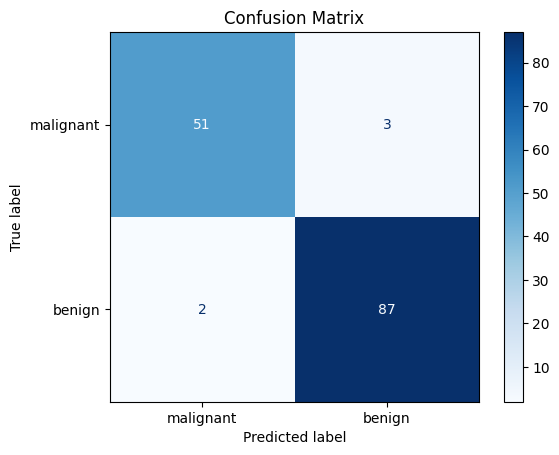

In [15]:
# 15. Train a Random Forest Classifier and visualize the confusion matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names # Get target names for the confusion matrix labels

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. Define and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = clf.predict(X_test)

# 5. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [16]:
# 16. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier # Using RandomForest as the final estimator for demonstration
import numpy as np

# 1. Create a sample dataset for classification
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.randint(0, 2, 100) # 100 samples, 2 classes

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the base estimators (level 0 models)
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(gamma='auto', probability=True, random_state=42)), # probability=True is needed for stacking
    ('lr', LogisticRegression(solver='liblinear', random_state=42))
]

# 4. Define the final estimator (level 1 model)
# This model will be trained on the predictions of the base estimators
final_estimator = RandomForestClassifier(n_estimators=10, random_state=42) # Using RandomForest for the final layer

# 5. Define the Stacking Classifier
# Pass the list of estimators and the final estimator
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5) # Using 5-fold cross-validation for stacking

# 6. Train the Stacking Classifier
print("Training Stacking Classifier...")
stacking_clf.fit(X_train, y_train)
print("Stacking Classifier training complete.")

# 7. Make predictions with the Stacking Classifier
y_pred_stacking = stacking_clf.predict(X_test)

# 8. Calculate and print the accuracy of the Stacking Classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking}")
print("-" * 30)

# 9. Optionally, train and evaluate the individual base estimators for comparison
print("Individual Base Estimator Accuracies:")
for name, estimator in estimators:
    estimator.fit(X_train, y_train)
    y_pred_base = estimator.predict(X_test)
    accuracy_base = accuracy_score(y_test, y_pred_base)
    print(f"{name.upper()} Accuracy: {accuracy_base}")


Training Stacking Classifier...
Stacking Classifier training complete.
Stacking Classifier Accuracy: 0.4
------------------------------
Individual Base Estimator Accuracies:
DT Accuracy: 0.35
SVC Accuracy: 0.45
LR Accuracy: 0.4


In [17]:
# 17. Train a Random Forest Classifier and print the top 5 most important features
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# 2. Split the data into training and testing sets (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. Define and train the Random Forest Classifier
# n_estimators is the number of trees in the forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 4. Get feature importance scores
feature_importances = clf.feature_importances_

# 5. Create a pandas Series for better visualization and sorting
importance_series = pd.Series(feature_importances, index=feature_names)

# 6. Sort the feature importances and print the top 5
sorted_importance = importance_series.sort_values(ascending=False)
print("Top 5 Most Important Features:")
print(sorted_importance.head(5))

Top 5 Most Important Features:
worst concave points    0.172295
worst area              0.123192
mean concave points     0.090299
mean concavity          0.083215
worst radius            0.081277
dtype: float64


In [18]:
# 18. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np

# 1. Create a sample dataset
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.randint(0, 2, 100) # 100 samples, 2 classes

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier()

# 4. Define the Bagging Classifier
# n_estimators is the number of base estimators in the ensemble
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)

# 5. Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# 7. Calculate and print Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Precision: {precision}")
print(f"Model Recall: {recall}")
print(f"Model F1-Score: {f1}")

# Optional: Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Precision: 0.5
Model Recall: 0.5555555555555556
Model F1-Score: 0.5263157894736842

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.50      0.56      0.53         9

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



Analyzing effect of max_depth on accuracy:
----------------------------------------
Training Random Forest with max_depth = None
  Training Accuracy: 1.0000
  Test Accuracy:     0.9650
----------------------------------------
Training Random Forest with max_depth = 5
  Training Accuracy: 0.9930
  Test Accuracy:     0.9650
----------------------------------------
Training Random Forest with max_depth = 10
  Training Accuracy: 1.0000
  Test Accuracy:     0.9650
----------------------------------------
Training Random Forest with max_depth = 15
  Training Accuracy: 1.0000
  Test Accuracy:     0.9650
----------------------------------------
Training Random Forest with max_depth = 20
  Training Accuracy: 1.0000
  Test Accuracy:     0.9650
----------------------------------------


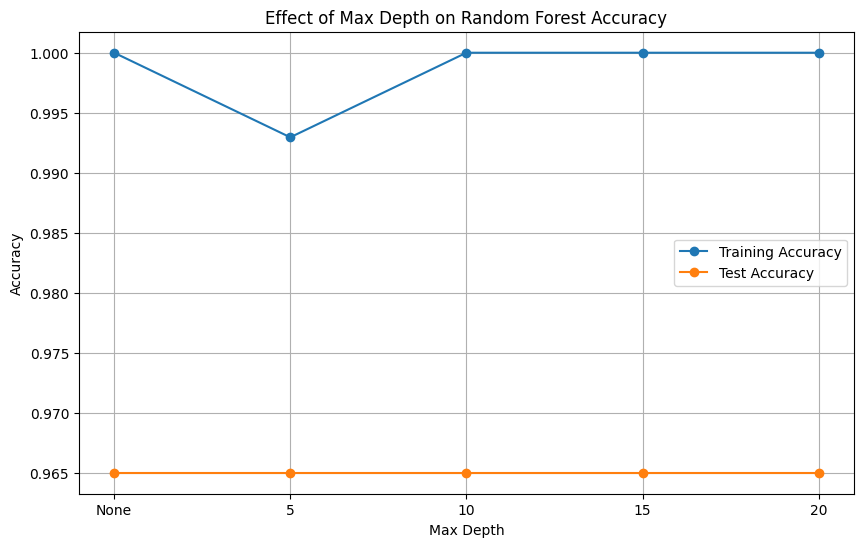

In [19]:
# 19. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. Define a list of different max_depth values to try
# None means nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
max_depth_list = [None, 5, 10, 15, 20]

# Lists to store accuracy for plotting
train_accuracies = []
test_accuracies = []

# 4. Iterate through the list of max_depth values and train/evaluate the model
print("Analyzing effect of max_depth on accuracy:")
print("-" * 40)
for max_depth in max_depth_list:
    print(f"Training Random Forest with max_depth = {max_depth}")

    # Define the Random Forest Classifier
    # n_estimators is kept constant for this analysis
    clf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the training and test sets
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Store accuracies for plotting
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Print the accuracies
    print(f"  Training Accuracy: {train_accuracy:.4f}")
    print(f"  Test Accuracy:     {test_accuracy:.4f}")
    print("-" * 40)

# 5. Plot the accuracies
plt.figure(figsize=(10, 6))
x_labels = [str(depth) for depth in max_depth_list]
plt.plot(x_labels, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(x_labels, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Max Depth on Random Forest Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# 20.  Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare  performance
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Create a sample dataset for regression
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.rand(100) * 100  # 100 samples, continuous target variable

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the base estimators
dt_base_estimator = DecisionTreeRegressor(random_state=42)
knn_base_estimator = KNeighborsRegressor(n_neighbors=5) # Example: using 5 neighbors

# 4. Define the Bagging Regressors with different base estimators
bagging_dt_regressor = BaggingRegressor(estimator=dt_base_estimator, n_estimators=10, random_state=42)
bagging_knn_regressor = BaggingRegressor(estimator=knn_base_estimator, n_estimators=10, random_state=42)

# 5. Train the Bagging Regressors
print("Training Bagging Regressor with Decision Tree base estimator...")
bagging_dt_regressor.fit(X_train, y_train)
print("Training Bagging Regressor with KNeighbors base estimator...")
bagging_knn_regressor.fit(X_train, y_train)
print("Training complete.")

# 6. Make predictions on the test set with both models
y_pred_dt = bagging_dt_regressor.predict(X_test)
y_pred_knn = bagging_knn_regressor.predict(X_test)

# 7. Calculate and print the Mean Squared Error for both models
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"Bagging Regressor (Decision Tree base) MSE: {mse_dt}")
print(f"Bagging Regressor (KNeighbors base) MSE: {mse_knn}")

Training Bagging Regressor with Decision Tree base estimator...
Training Bagging Regressor with KNeighbors base estimator...
Training complete.
Bagging Regressor (Decision Tree base) MSE: 1015.8115468169684
Bagging Regressor (KNeighbors base) MSE: 1244.990060951855


In [21]:
# 21. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. Define and train the Random Forest Classifier
# n_estimators is the number of trees in the forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 4. Make probability predictions on the test set
# ROC-AUC requires probability estimates for the positive class
y_pred_proba = clf.predict_proba(X_test)[:, 1] # Get probabilities for the positive class (class 1)

# 5. Calculate and print the ROC-AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Model ROC-AUC Score: {auc_score}")

Model ROC-AUC Score: 0.9962546816479401


In [22]:
# 22. Train a Bagging Classifier and evaluate its performance using cross-validatio.
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. Create a sample dataset
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.randint(0, 2, 100) # 100 samples, 2 classes

# 2. Define the base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier()

# 3. Define the Bagging Classifier
# n_estimators is the number of base estimators in the ensemble
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)

# 4. Perform cross-validation
# cv: number of folds for cross-validation
# scoring: the metric to evaluate (e.g., 'accuracy', 'precision', 'recall', 'f1', 'roc_auc')
cv_scores = cross_val_score(bagging_classifier, X, y, cv=5, scoring='accuracy')

# 5. Print the cross-validation scores and their mean
print("Cross-validation scores (accuracy):", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

Cross-validation scores (accuracy): [0.4 0.6 0.2 0.3 0.7]
Mean cross-validation accuracy: 0.44000000000000006


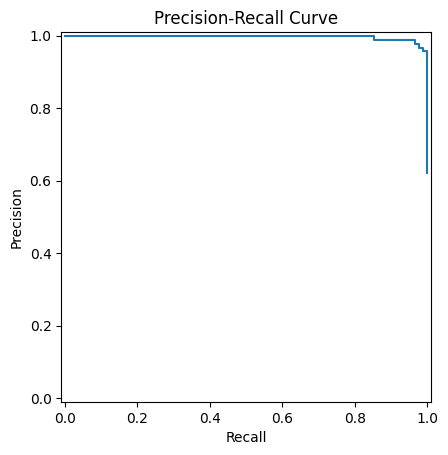

In [23]:
# 23. Train a Random Forest Classifier and plot the Precision-Recall curv
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. Define and train the Random Forest Classifier
# It's important to train with a model that can output probabilities or decision function scores
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 4. Get the probability estimates for the positive class on the test set
# The Precision-Recall curve requires probability estimates
y_scores = clf.predict_proba(X_test)[:, 1]

# 5. Compute the precision-recall curve points
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# 6. Plot the Precision-Recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()

In [24]:
# 24. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_breast_cancer # Using a standard dataset for simplicity

# 1. Load a sample dataset for classification
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the base estimators (level 0 models)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(solver='liblinear', random_state=42))
]

# 4. Define the final estimator (level 1 model)
# This model will be trained on the predictions of the base estimators
# Using Logistic Regression as the final estimator for this example
final_estimator = LogisticRegression(solver='liblinear', random_state=42)

# 5. Define the Stacking Classifier
# Pass the list of estimators and the final estimator
# cv is used for cross-validation to generate out-of-fold predictions for training the final estimator
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)

# 6. Train the Stacking Classifier
print("Training Stacking Classifier...")
stacking_clf.fit(X_train, y_train)
print("Stacking Classifier training complete.")

# 7. Make predictions with the Stacking Classifier
y_pred_stacking = stacking_clf.predict(X_test)

# 8. Calculate and print the accuracy of the Stacking Classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking}")
print("-" * 30)

# 9. Optionally, train and evaluate the individual base estimators for comparison
print("Individual Base Estimator Accuracies:")
for name, estimator in estimators:
    # Create a new instance of the estimator to avoid issues with the stacking object
    if name == 'rf':
        individual_estimator = RandomForestClassifier(n_estimators=100, random_state=42)
    elif name == 'lr':
        individual_estimator = LogisticRegression(solver='liblinear', random_state=42)
    else:
        continue # Skip if not one of the defined base estimators

    individual_estimator.fit(X_train, y_train)
    y_pred_base = individual_estimator.predict(X_test)
    accuracy_base = accuracy_score(y_test, y_pred_base)
    print(f"{name.upper()} Accuracy: {accuracy_base}")

Training Stacking Classifier...
Stacking Classifier training complete.
Stacking Classifier Accuracy: 0.9736842105263158
------------------------------
Individual Base Estimator Accuracies:
RF Accuracy: 0.9649122807017544
LR Accuracy: 0.956140350877193


In [25]:
# 25. Train a Bagging Regressor with different levels of bootstrap samples and compare performance
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Create a sample dataset for regression
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.rand(100) * 100  # 100 samples, continuous target variable

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the base estimator (Decision Tree Regressor)
base_estimator = DecisionTreeRegressor(random_state=42)

# 4. Define a list of different max_samples values to try
# max_samples can be an integer (number of samples) or a float (proportion)
max_samples_list = [0.5, 0.7, 1.0] # Trying different proportions of the dataset

# 5. Iterate through the list of max_samples values and train/evaluate the model
print("Analyzing effect of max_samples on Bagging Regressor performance:")
print("-" * 60)
for max_samples in max_samples_list:
    print(f"Training Bagging Regressor with max_samples = {max_samples}")

    # Define the Bagging Regressor
    # n_estimators is kept constant for this analysis
    bagging_regressor = BaggingRegressor(
        estimator=base_estimator,
        n_estimators=50, # Keep n_estimators constant to focus on max_samples
        max_samples=max_samples,
        random_state=42
    )

    # Train the regressor
    bagging_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = bagging_regressor.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Print the MSE
    print(f"  Mean Squared Error (MSE) with max_samples {max_samples}: {mse}")
    print("-" * 60) # Separator for clarity

Analyzing effect of max_samples on Bagging Regressor performance:
------------------------------------------------------------
Training Bagging Regressor with max_samples = 0.5
  Mean Squared Error (MSE) with max_samples 0.5: 952.5728492418444
------------------------------------------------------------
Training Bagging Regressor with max_samples = 0.7
  Mean Squared Error (MSE) with max_samples 0.7: 1006.1407516926745
------------------------------------------------------------
Training Bagging Regressor with max_samples = 1.0
  Mean Squared Error (MSE) with max_samples 1.0: 971.7099500121967
------------------------------------------------------------
